# Analyzing Features

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.model_selection import train_test_split
import itertools

In [16]:
df = pd.read_csv('finalDF.csv',index_col=0)
df = df.drop(columns=['glucose','diagnosis_tokenized'])
display(df.head())

,hadm_id,subject_id,expire_flag,diagnosis,admission_type,age,admission_type_encoded,0,1,2,...,18,19,20,21,22,23,24,a,b,range
0,137275,9319,0,LEFT RENAL CA/SDA,ELECTIVE,82,0,118.0,97.0,97.0,...,115.0,115.0,133.0,133.0,142.0,142.0,99.0,1,0.0,82.0
1,125380,31585,0,PNEUMONIA,EMERGENCY,300,1,118.0,127.0,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,20.0
2,132722,1426,0,LEFT FRONTAL HEMORRHAGE,EMERGENCY,80,1,104.0,104.0,205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,0.0,101.0
3,101422,71582,0,AORTIC STENOSIS,EMERGENCY,76,1,106.0,134.0,132.0,...,178.0,164.0,140.0,0.0,0.0,0.0,0.0,16,0.0,88.0
4,139687,68501,0,CAROTID STENOSIS/SDA,ELECTIVE,86,0,162.0,180.0,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73,1.0,130.0


In [17]:
overfitting = df.loc[df['expire_flag'] == 1]

df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)

In [24]:
features = df.drop(columns=['hadm_id','subject_id','expire_flag',
                            'diagnosis','admission_type'])
pydf = df.values
print(pydf.shape)
X = pydf[:,5:35]
y = pydf[:,2]

(20875, 35)


# Feature Importance

Feature ranking:
1. feature 0 (0.089984)
2. feature 2 (0.062334)
3. feature 29 (0.054738)
4. feature 3 (0.052631)
5. feature 4 (0.050901)
6. feature 27 (0.049681)
7. feature 5 (0.049257)
8. feature 6 (0.042442)
9. feature 7 (0.040007)
10. feature 8 (0.035235)
11. feature 9 (0.033478)
12. feature 1 (0.032154)
13. feature 10 (0.029984)
14. feature 11 (0.029218)
15. feature 28 (0.027424)
16. feature 12 (0.025987)
17. feature 14 (0.025971)
18. feature 13 (0.024685)
19. feature 16 (0.023977)
20. feature 15 (0.023288)
21. feature 17 (0.022086)
22. feature 21 (0.021582)
23. feature 18 (0.020971)
24. feature 19 (0.020262)
25. feature 25 (0.019573)
26. feature 22 (0.019359)
27. feature 20 (0.018967)
28. feature 23 (0.018820)
29. feature 24 (0.017558)
30. feature 26 (0.017446)


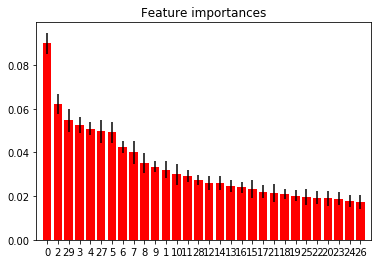

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

XImp = pydf[:,5:35]
yImp = pydf[:,2]
xImp = np.asarray(XImp,dtype=np.float64)
yImp = np.asarray(yImp,dtype=np.float64)
forest = ExtraTreesClassifier()
forest.fit(XImp,yImp)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(30):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, 30])
plt.show()

# Feature Correlation via Heatmap

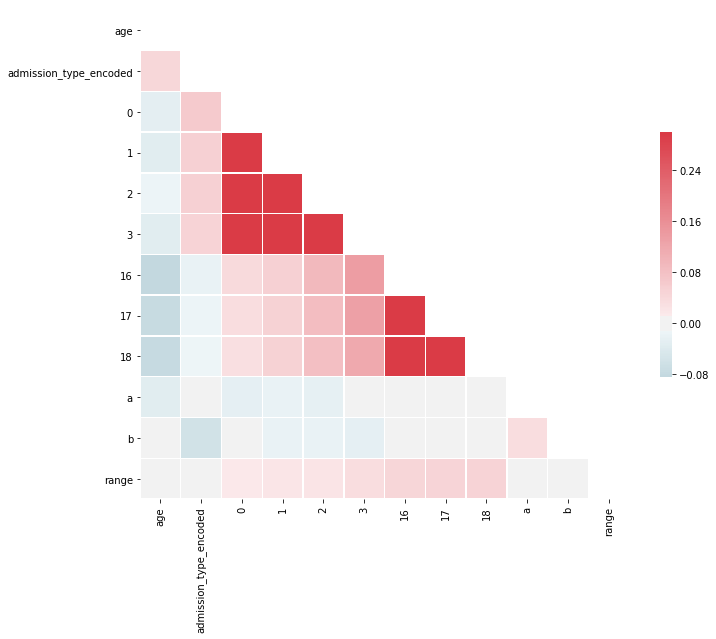

In [29]:
import seaborn as sns
d = df[['age','admission_type_encoded','0','1','2','3','16','17','18','a','b','range']].copy()
corr = d.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})